In [1]:
#Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
pd.set_option('display.max_rows',False)

In [3]:
df = pd.read_csv(r'C:\Users\andre\OneDrive\Desktop\Python\Airbnb_Open_Data.csv')

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [5]:
# Checking nulls
for col in df.columns:
    pct_null = round(np.mean(df[col].isna())*100,3)
    print('{}: {}'.format(col,pct_null))

id: 0.0
NAME: 0.244
host id: 0.0
host_identity_verified: 0.282
host name: 0.396
neighbourhood group: 0.028
neighbourhood: 0.016
lat: 0.008
long: 0.008
country: 0.519
country code: 0.128
instant_bookable: 0.102
cancellation_policy: 0.074
room type: 0.0
Construction year: 0.209
price: 0.241
service fee: 0.266
minimum nights: 0.399
number of reviews: 0.178
last review: 15.49
reviews per month: 15.477
review rate number: 0.318
calculated host listings count: 0.311
availability 365: 0.437
house_rules: 50.81
license: 99.998


In [6]:
# License is unnecessary, nearly entirely null and I don't anticipate using it
df.drop('license',axis=1,inplace=True)

In [7]:
# Checking if any listings are outside of the US
df.groupby('country').count()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country code,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
country,,,,,,,,,,,,,,,,,,,,,
United States,102067,101822,102067,101781,101662,102039,102053,102059,102059,102024,...,101825,101794,101658,101884,86217,86228,101741,101748,101626,50275


In [8]:
# Looks like the only ones that aren't United States are null, can assume those are also US. I'm going to drop the country column

df.drop('country',axis=1,inplace=True)
df.drop('country code',axis=1,inplace=True)

In [9]:
#removing $ from service fee and price so they can be converted to float
df['service fee'] = df['service fee'].str[1:]
df['price'] = df['price'].str[1:]

In [10]:
df['service fee'] = df['service fee'].astype('float64')

In [11]:
# In order to convert price to float, I used a lambda expression and string function to replace commas with empty strings,
# then converted float.
df['price'] = df['price'].astype('str')
df['price'] = df['price'].apply (lambda x: x.replace(',',''))
df['price'] = df['price'].astype('float64')

In [12]:
#Checking overall statistics at a glance
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102352.000000,102326.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,625.293536,125.026924,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,331.671614,66.325739,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,340.000000,68.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,624.000000,125.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,913.000000,183.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [13]:
# Looking for most common neighborhoods
df.groupby('neighbourhood').count()['id'].sort_values(ascending=False)

neighbourhood
Bedford-Stuyvesant            7937
Williamsburg                  7775
Harlem                        5466
Bushwick                      4982
Hell's Kitchen                3965
Upper West Side               3860
Upper East Side               3680
East Village                  3492
Midtown                       3390
Crown Heights                 3262
East Harlem                   2341
Chelsea                       2285
Greenpoint                    2143
Lower East Side               1948
Astoria                       1876
                              ... 
Howland Hook                     6
West Farms                       6
Westerleigh                      5
Richmondtown                     5
Co-op City                       5
Bay Terrace, Staten Island       4
New Dorp                         4
Gerritsen Beach                  3
Willowbrook                      3
Rossville                        3
Woodrow                          3
Lighthouse Hill                  3
Glen O

In [14]:
# Looking for priciest neighborhoods
df.groupby('neighbourhood').mean()['price'].sort_values(ascending=False)

neighbourhood
New Dorp                      1045.000000
Chelsea, Staten Island        1042.000000
Fort Wadsworth                1024.000000
Little Neck                    817.750000
Jamaica Hills                  812.904762
Arden Heights                  804.888889
Midland Beach                  796.176471
Shore Acres                    792.260870
Mill Basin                     775.142857
Riverdale                      768.736842
East Morrisania                764.666667
Morris Heights                 742.891304
Pelham Bay                     740.045455
North Riverdale                736.250000
Graniteville                   732.571429
                                 ...     
Castle Hill                    485.181818
Navy Yard                      481.935484
Oakwood                        480.642857
Prince's Bay                   477.875000
Westerleigh                    477.200000
Randall Manor                  472.400000
West Farms                     463.166667
Emerson Hill        

In [15]:
# Checking out neighbourhood group column

# I notice that there appear to be two bnbs with misspelled neighbourhood groups
df.groupby('neighbourhood group').count()

,id,NAME,host id,host_identity_verified,host name,neighbourhood,lat,long,instant_bookable,cancellation_policy,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
neighbourhood group,,,,,,,,,,,,,,,,,,,,,
Bronx,2712,2704,2712,2703,2704,2712,2712,2712,2711,2711,...,2705,2706,2704,2712,2361,2361,2695,2704,2696,1138
Brooklyn,41842,41734,41842,41719,41678,41834,41839,41839,41785,41800,...,41749,41724,41687,41772,35968,35973,41724,41705,41653,20786
Manhattan,43792,43689,43792,43675,43613,43784,43788,43788,43756,43769,...,43682,43682,43599,43718,35989,35994,43648,43647,43626,22104
Queens,13267,13239,13267,13240,13218,13267,13266,13266,13259,13259,...,13234,13232,13219,13228,11509,11511,13228,13240,13202,5990
Staten Island,955,954,955,950,950,955,955,955,954,954,...,952,952,951,955,852,852,949,953,954,428
brookln,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
manhatan,1,1,1,1,1,1,1,1,0,1,...,1,0,1,1,1,1,1,1,1,0


In [16]:
# Taking a closer look at these two

df[(df['neighbourhood group'] == 'manhatan') | (df['neighbourhood group'] == 'brookln')]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,True,...,580.0,116.0,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0,NaN
18,1011277,Chelsea Perfect,73862528370,verified,Alberta,manhatan,Chelsea,40.74192,-73.99501,NaN,...,460.0,NaN,1.0,260.0,7/1/2019,2.12,3.0,1.0,325.0,NaN


In [17]:
# Can tell that these are typos. Fixing the spelling here so that they are counted in the right groups
df['neighbourhood group'] = df['neighbourhood group'].str.replace('brookln','Brooklyn')
df['neighbourhood group'] = df['neighbourhood group'].str.replace('manhatan','Manhattan')

In [19]:
df_numerical = df.copy()

for col in df_numerical.columns:
    if (df_numerical[col].dtype == 'object'):
        df_numerical[col] = df_numerical[col].astype('category')
        df_numerical[col] = df_numerical[col].cat.codes

df_numerical.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,1001254,15776,80014485718,0,7424,1,111,40.64749,-73.97237,0,...,966.0,193.0,10.0,9.0,282,0.21,4.0,6.0,286.0,444
1,1002102,47920,52335172823,1,5491,2,130,40.75362,-73.98377,0,...,142.0,28.0,30.0,45.0,1502,0.38,4.0,2.0,228.0,1218
2,1002403,55353,78829239556,-1,3337,2,97,40.80902,-73.94190,1,...,620.0,124.0,3.0,0.0,-1,NaN,5.0,1.0,352.0,583
3,1002755,-1,85098326012,0,4062,1,42,40.68514,-73.95976,1,...,368.0,74.0,30.0,270.0,2023,4.64,4.0,1.0,322.0,-1
4,1003689,23723,92037596077,1,7361,2,62,40.79851,-73.94399,0,...,204.0,41.0,10.0,9.0,485,0.10,3.0,1.0,289.0,1368


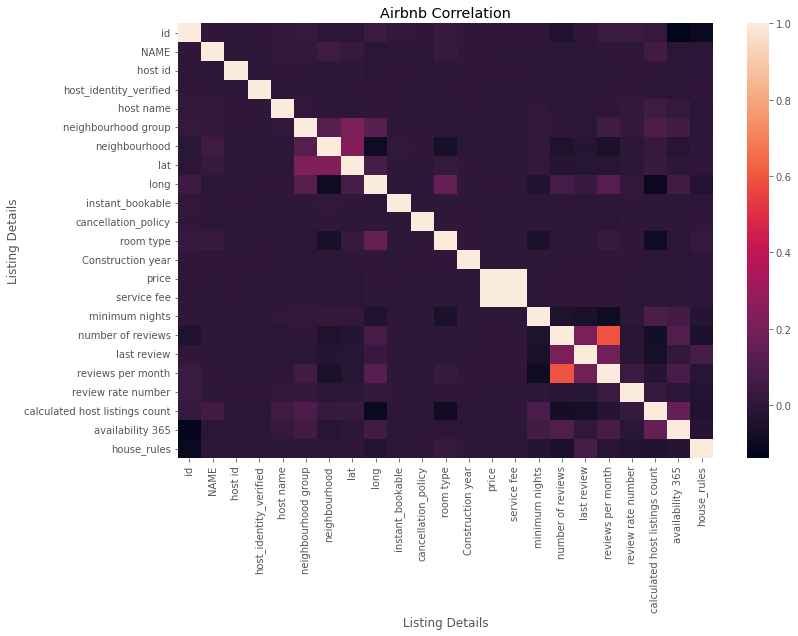

In [20]:
matrix = df_numerical.corr(method='pearson')
sns.heatmap(matrix)

plt.title('Airbnb Correlation')
plt.xlabel('Listing Details')
plt.ylabel('Listing Details')

plt.show()

#Surprisingly little correlation among variables. I had expected price to be correlated with neighborhood.

In [21]:
#I'd like a closer look at what, if anything, is correlated to price
mat_sorted = matrix.unstack().sort_values(ascending=False)
mat_sorted.loc['price']

price                             1.000000
service fee                       0.999991
id                                0.006739
last review                       0.006405
number of reviews                 0.005229
reviews per month                 0.004186
host id                           0.003837
long                              0.003269
room type                         0.001064
instant_bookable                  0.000261
calculated host listings count   -0.000106
neighbourhood group              -0.000215
NAME                             -0.001185
cancellation_policy              -0.002113
availability 365                 -0.002833
host name                        -0.002964
minimum nights                   -0.003471
house_rules                      -0.003547
Construction year                -0.003753
host_identity_verified           -0.004515
review rate number               -0.004576
neighbourhood                    -0.005776
lat                              -0.005900
dtype: floa

In [22]:
#What are the highest correlation pairs?

mat_sorted[(abs(mat_sorted) > 0.4) & (mat_sorted != 1)]

price              service fee          0.999991
service fee        price                0.999991
reviews per month  number of reviews    0.590939
number of reviews  reviews per month    0.590939
dtype: float64

(array([3466., 3290., 3466., 3344., 3411., 3381., 3474., 3200., 3257.,
        3647., 3381., 3507., 3550., 3363., 3446., 3642., 3277., 3456.,
        3444., 3294., 3292., 3453., 3358., 3378., 3541., 3327., 3405.,
        3431., 3429., 3442.]),
 array([  50.        ,   88.33333333,  126.66666667,  165.        ,
         203.33333333,  241.66666667,  280.        ,  318.33333333,
         356.66666667,  395.        ,  433.33333333,  471.66666667,
         510.        ,  548.33333333,  586.66666667,  625.        ,
         663.33333333,  701.66666667,  740.        ,  778.33333333,
         816.66666667,  855.        ,  893.33333333,  931.66666667,
         970.        , 1008.33333333, 1046.66666667, 1085.        ,
        1123.33333333, 1161.66666667, 1200.        ]),
 <BarContainer object of 30 artists>)

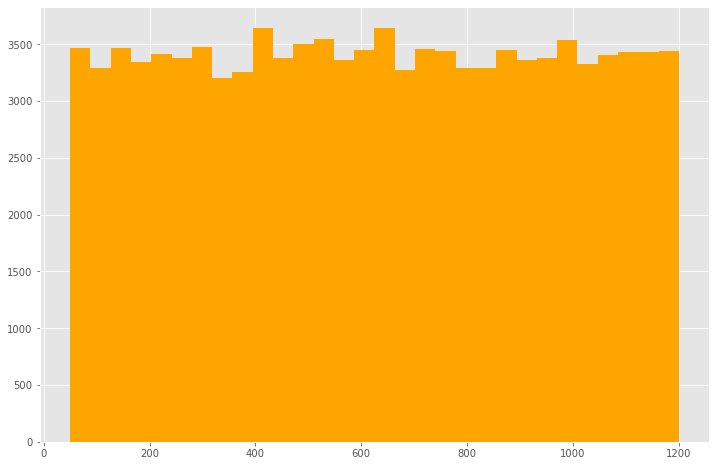

In [84]:
#Price is also very evenly distributed
plt.hist(df['price'],bins=30,stacked=True,color='orange')

<AxesSubplot:xlabel='neighbourhood group', ylabel='Count'>

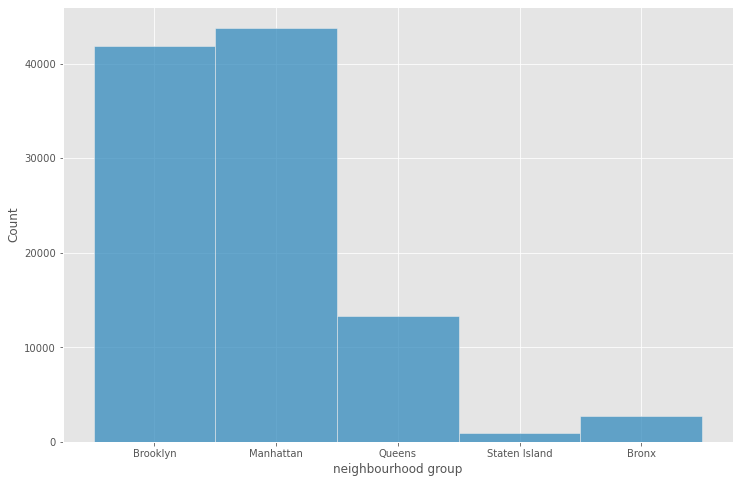

In [30]:
sns.histplot(df['neighbourhood group'])

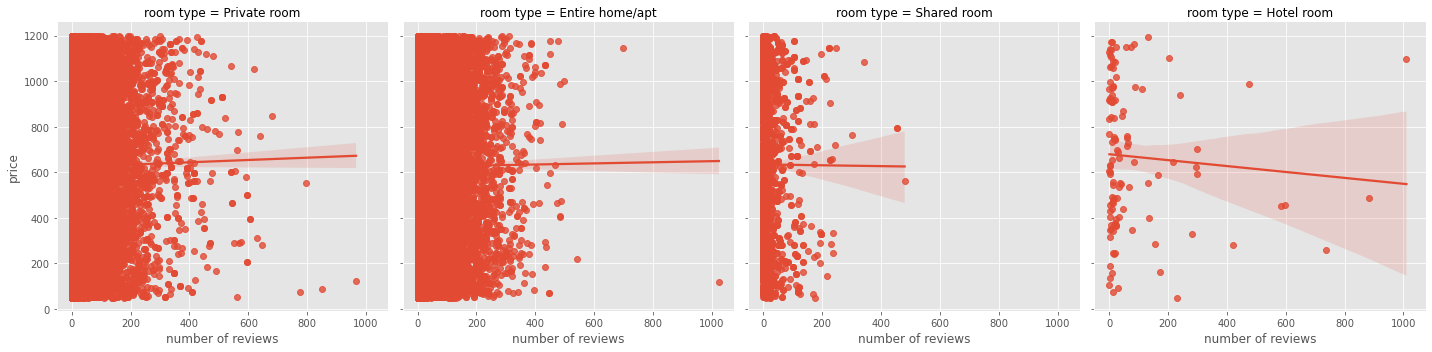

In [31]:
sns.lmplot(x='number of reviews',y='price',data=df,col='room type')

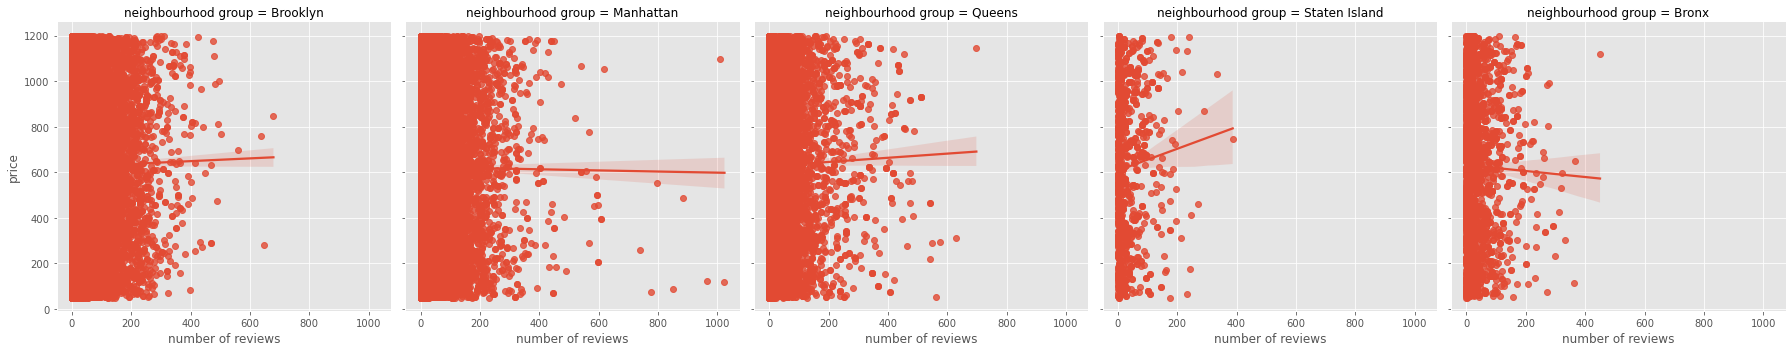

In [32]:
sns.lmplot(x='number of reviews',y='price',data=df,col='neighbourhood group')

In [33]:
#Because there are so many datapoints, I'm going to start looking at neighborhoods as their own datapoints, with avg prices
# and review statistics:

In [34]:
df_grouped = df.groupby('neighbourhood')[['price','number of reviews','minimum nights','availability 365','calculated host listings count']].mean()

df_neighborhoods = pd.merge(df_grouped,df[['neighbourhood','neighbourhood group']],on='neighbourhood', how='left').drop_duplicates()
df_neighborhoods = df_neighborhoods[df_neighborhoods['neighbourhood group'].notna()]

In [35]:
df_neighborhoods.head()

,neighbourhood,price,number of reviews,minimum nights,availability 365,calculated host listings count,neighbourhood group
0,Allerton,636.343750,56.618557,3.773196,188.125000,2.614583,Bronx
97,Arden Heights,804.888889,15.555556,11.333333,145.111111,1.000000,Staten Island
106,Arrochar,625.764706,25.346154,3.038462,228.980769,4.137255,Staten Island
158,Arverne,652.125561,34.098655,4.228700,179.022624,1.959641,Queens
381,Astoria,639.035275,26.816239,7.024599,140.910118,3.777363,Queens


In [36]:
#I noticed potential duplicate neighborhoods, two have commas in the name, going to rule out that these neighborhoods
#Do not exist twice

df_neighborhoods[df_neighborhoods['neighbourhood'].str.contains(',')]

,neighbourhood,price,number of reviews,minimum nights,availability 365,calculated host listings count,neighbourhood group
2735,"Bay Terrace, Staten Island",429.5,1.5,16.5,0.0,1.0,Staten Island
20866,"Chelsea, Staten Island",1042.0,31.0,3.0,164.0,1.0,Staten Island


In [37]:
#Looks as though each is unique. Will leave this as is.

df_neighborhoods[(df_neighborhoods['neighbourhood'].str.contains('Chelsea')) | (df_neighborhoods['neighbourhood'].str.contains('Bay Terrace'))]

,neighbourhood,price,number of reviews,minimum nights,availability 365,calculated host listings count,neighbourhood group
2727,Bay Terrace,635.000000,35.125000,2.625000,214.375000,1.500000,Queens
2735,"Bay Terrace, Staten Island",429.500000,1.500000,16.500000,0.000000,1.000000,Staten Island
18581,Chelsea,633.500877,26.004388,10.889135,144.979691,14.252742,Manhattan
20866,"Chelsea, Staten Island",1042.000000,31.000000,3.000000,164.000000,1.000000,Staten Island


In [38]:
df_neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 0 to 101996
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   224 non-null    object 
 1   price                           224 non-null    float64
 2   number of reviews               224 non-null    float64
 3   minimum nights                  224 non-null    float64
 4   availability 365                224 non-null    float64
 5   calculated host listings count  224 non-null    float64
 6   neighbourhood group             224 non-null    object 
dtypes: float64(5), object(2)
memory usage: 14.0+ KB


Text(0, 0.5, 'Avg. Price per Night')

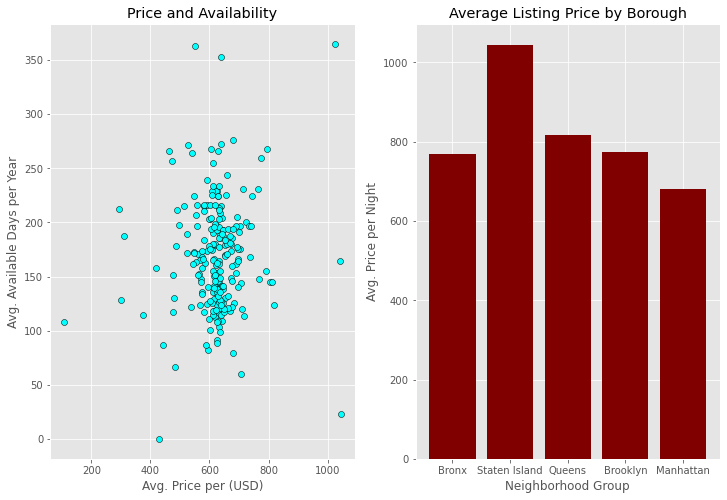

In [75]:

fig,axes = plt.subplots(nrows=1,ncols=2)
plt.xlabel('Price')


axes[0].scatter(df_neighborhoods['price'],df_neighborhoods['availability 365'],edgecolors='black',color='cyan')
axes[0].set_title('Price and Availability')
axes[0].set_ylabel('Avg. Available Days per Year')
axes[0].set_xlabel('Avg. Price per (USD)')

axes[1].bar(df_neighborhoods['neighbourhood group'],df_neighborhoods['price'],color='maroon')
axes[1].set_title('Average Listing Price by Borough')
axes[1].set_xlabel('Neighborhood Group')
axes[1].set_ylabel('Avg. Price per Night')

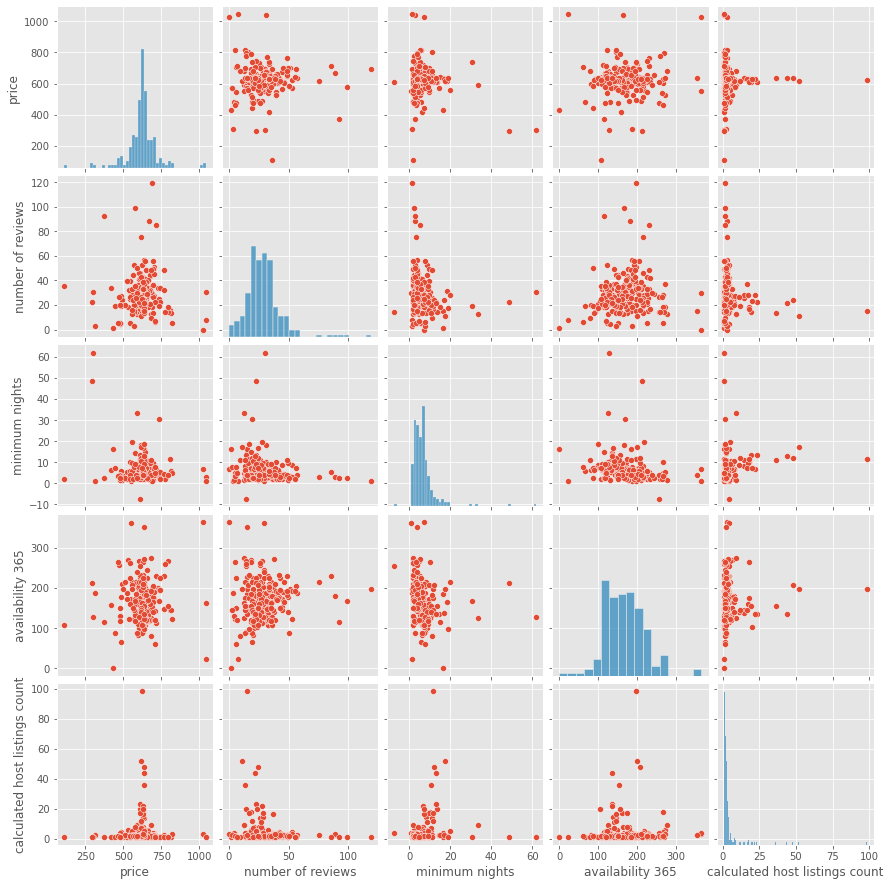

In [76]:
sns.pairplot(df_neighborhoods)

<AxesSubplot:xlabel='price', ylabel='Count'>

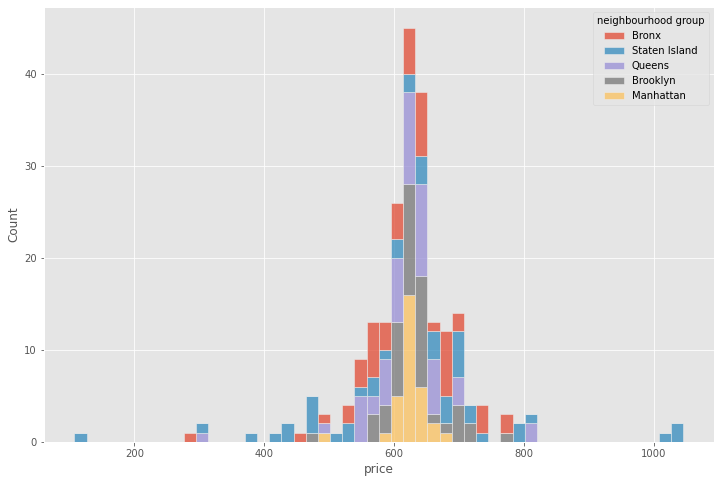

In [77]:
#Stacked bar chart of mean price per neighborhood, stacked by neighborhood group
sns.histplot(x='price',data=df_neighborhoods,hue='neighbourhood group',bins=50,multiple='stack')

In [78]:
#I want to see who the expensive outliers are in Staten Island. In order to show titles in sort,
#I had to set neighbourhood as index
df_neighborhoods.set_index('neighbourhood',inplace=True)
df_neighborhoods.sort_values('price',ascending=False)

,price,number of reviews,minimum nights,availability 365,calculated host listings count,neighbourhood group
neighbourhood,,,,,,
New Dorp,1045.000000,7.750000,1.250000,22.750000,1.000000,Staten Island
"Chelsea, Staten Island",1042.000000,31.000000,3.000000,164.000000,1.000000,Staten Island
Fort Wadsworth,1024.000000,0.000000,7.000000,365.000000,3.000000,Staten Island
Little Neck,817.750000,5.000000,5.125000,123.875000,3.125000,Queens
Jamaica Hills,812.904762,13.857143,5.666667,145.000000,1.523810,Queens
Arden Heights,804.888889,15.555556,11.333333,145.111111,1.000000,Staten Island
Midland Beach,796.176471,14.176471,3.823529,267.882353,1.176471,Staten Island
Shore Acres,792.260870,18.521739,3.826087,155.130435,1.217391,Staten Island
Mill Basin,775.142857,14.285714,2.214286,259.357143,1.071429,Brooklyn


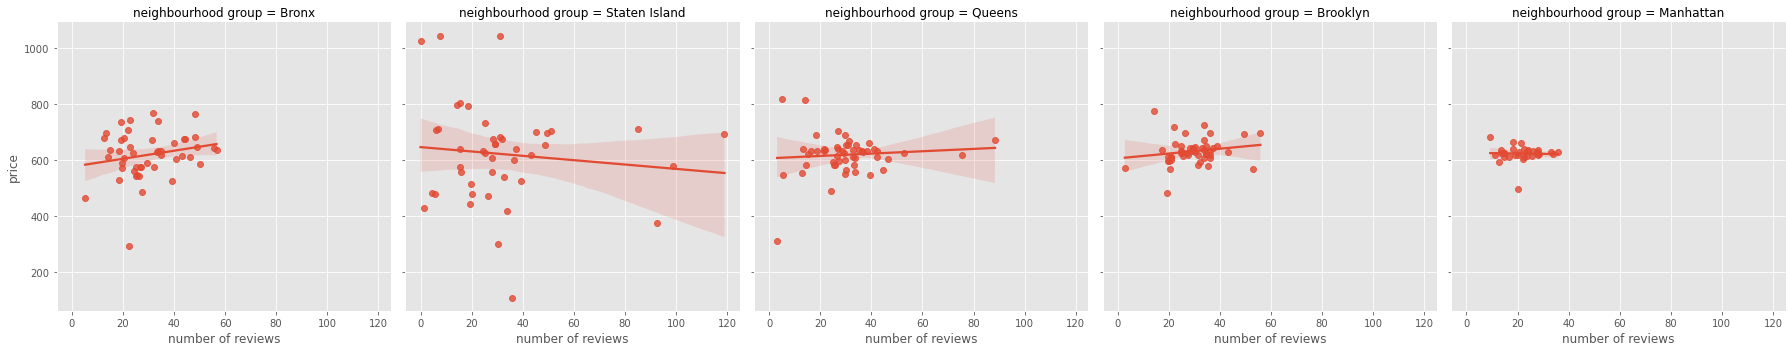

In [79]:
sns.lmplot(x='number of reviews',y='price',data=df_neighborhoods,col='neighbourhood group')

<AxesSubplot:>

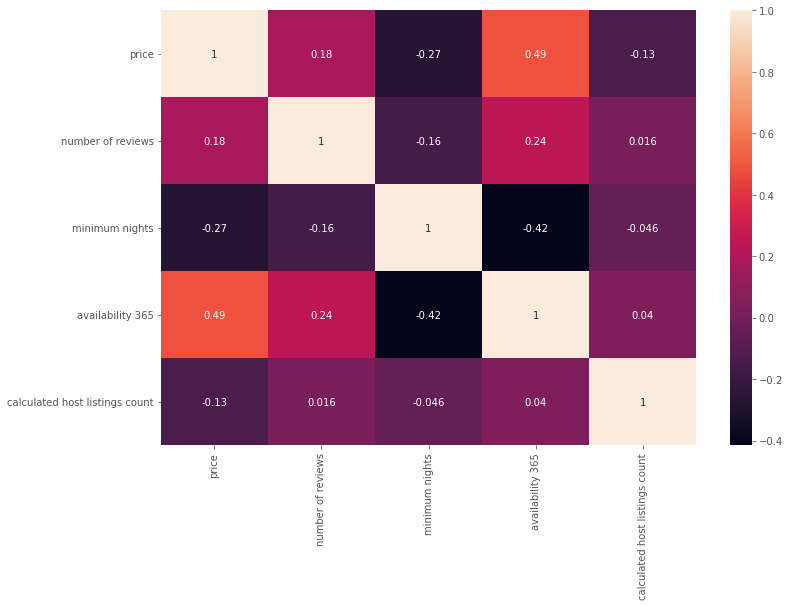

In [80]:
#Appears that Brooklyn has a relatively narrow confidence interval, I wonder if there are significant correlations if I 
#Look only at neighborhoods in Brooklyn?

sns.heatmap(df_neighborhoods[df_neighborhoods['neighbourhood group'] == 'Brooklyn'].corr(),annot=True)

#Slightly higher correlation between price and listings that are available more throughout the year than the overall data.

In [81]:
#Overall found no correlations in the data based off of price, reviews or neighborhood, contrary to expectations.